# Wallermat
_Walmart runs several promotional markdown events throughout the year. These 
markdowns precede prominent holidays, the four largest of all, which are the 
Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these 
holidays are weighted five times higher in the evaluation than non-holiday weeks. 
Part of the challenge presented by this assignment is modeling the effects of 
markdowns on these holiday weeks in the absence of complete/ideal historical 
data. Historical sales data for 45 Walmart stores located in different regions are 
available._


In [7]:
#First step let's put our needed modules in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import warnings as wn
wn.filterwarnings("ignore")
sns.set_style("darkgrid")

In [8]:
# Please check that your input true
data = pd.read_csv(r"Data\walmart.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## __Next step is to Know the environment of our data__ 

In [9]:
def wrangle(walmart):
    # Return first 5 elements of data
    print(walmart.head(),"_"*80,sep="\n")
    # Discription of our data
    print(walmart.describe(),"_"*80,sep="\n") 
    # Some information about our data types
    print(walmart.info(),"_"*80,sep="\n")
    # Some check if there's nullity in data
    print(f"null values = \n{walmart.isnull().sum()}","_"*80,sep="\n")
    # Some check if there's any duplication
    print(f"Number of duplication : {walmart.duplicated().sum()}","_"*80,sep="\n")
    # Return last 5 elements of data
    print(walmart.tail(),"_"*80,sep="\n")
    #Let's first step to change the type of date and then check the info again
    walmart.Date = pd.to_datetime(walmart.Date,format="mixed")
    walmart.info()
    # First step to seprate all date 
    walmart["Day"] = walmart.Date.dt.day
    walmart["Month"] = walmart.Date.dt.month
    walmart["Year"] = walmart.Date.dt.year
    # Need to put Seasons to know which of summer or winter or even any of the 4 is the best one to make offers in this period
    season_month_south = {
                12:'Winter', 1:'Winter', 2:'Winter',
                3:'Spring', 4:'Spring', 5:'Spring',
                6:'Summer', 7:'Summer', 8:'Summer',
                9:'Autumn', 10:'Autumn', 11:'Autumn'}
    walmart["Season"] = walmart["Month"].map(season_month_south)
    walmart.head()
    print("################ DONE #####################")
    return walmart

In [10]:
walmart = wrangle(data)
walmart.to_csv("Data/After_Wrangling.csv")

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
________________________________________________________________________________
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049  

### **Some visualize for the important quantitive variables distributions in our data "Weekly sales , Fuel price , CPI , Tempreature and Unemployment"**

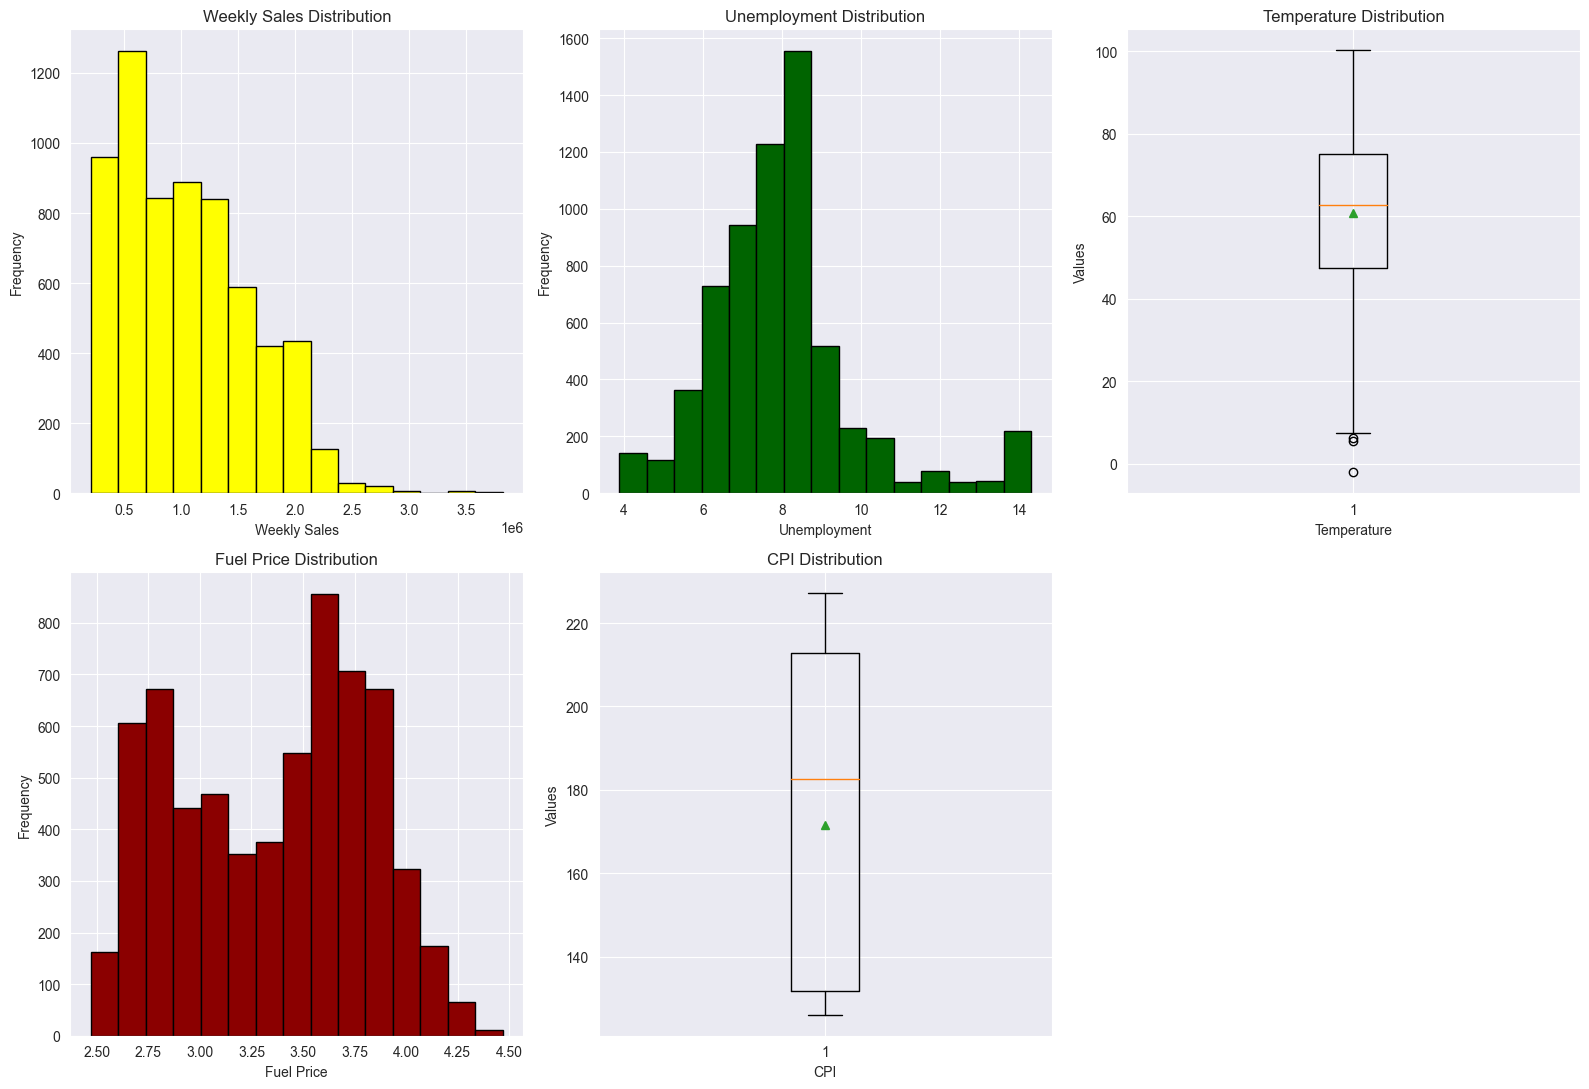

In [11]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(16, 11))
ax[1, 2].set_visible(False)

# Plot Weekly Sales Distribution
ax[0, 0].hist(x=walmart["Weekly_Sales"], bins=15, color="yellow", edgecolor="black")
ax[0, 0].set_xlabel("Weekly Sales")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].set_title("Weekly Sales Distribution")

# Plot Unemployment Distribution
ax[0, 1].hist(x=walmart["Unemployment"], bins=15, color="darkgreen", edgecolor="black")
ax[0, 1].set_xlabel("Unemployment")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].set_title("Unemployment Distribution")

# Plot Temperature Distribution
ax[0, 2].boxplot(x=walmart["Temperature"], showmeans=True)
ax[0, 2].set_xlabel("Temperature")
ax[0, 2].set_ylabel("Values")
ax[0, 2].set_title("Temperature Distribution")

# Plot Fuel Price Distribution
ax[1, 0].hist(x=walmart["Fuel_Price"], bins=15, color="darkred", edgecolor="black")
ax[1, 0].set_xlabel("Fuel Price")
ax[1, 0].set_ylabel("Frequency")
ax[1, 0].set_title("Fuel Price Distribution")

# Plot CPI Distribution
ax[1, 1].boxplot(x=walmart["CPI"], showmeans=True)
ax[1, 1].set_xlabel("CPI")
ax[1, 1].set_ylabel("Values")
ax[1, 1].set_title("CPI Distribution")

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig("Images/environment_visualizations.png")

# Show the plot (optional)
plt.show()


# a) Which store has maximum sales ?
__to perform this topic we need to make pivoting between stores and sum of weekly sales to know who has the most sales between all weeks__


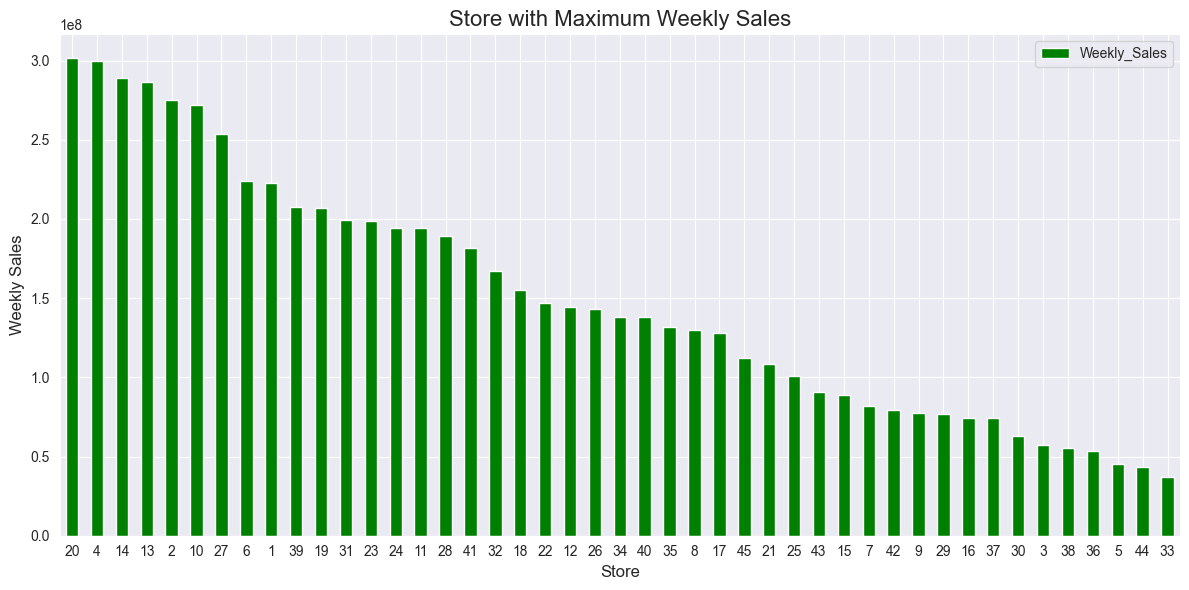

In [12]:
Store_With_Maximum_Sales = walmart.groupby("Store")["Weekly_Sales"].agg(np.sum).to_frame().sort_values(by="Weekly_Sales",ascending=False)
# Create a bar plot
ax = Store_With_Maximum_Sales.plot(kind="bar", figsize=(12, 6), color="green", legend=False)

# Set plot title and labels
plt.title("Store with Maximum Weekly Sales", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.xticks(rotation=0)

# Highlight the store with the maximum sales
max_sales_store = Store_With_Maximum_Sales[Store_With_Maximum_Sales["Weekly_Sales"] == max(Store_With_Maximum_Sales["Weekly_Sales"])]

Store_With_Maximum_Sales.to_csv("Data/Store_With_Maximum_Sales.csv")

# Show the plot
plt.tight_layout()
plt.legend()
plt.savefig("images/Max_Store_Weekly_Sales.png")
plt.show()

### Then the highest in Weekly sales was Store number ___20___

# b) Which store has maximum standard deviation i.e., the sales vary a lot
__To perform this topic we need to pivot between Store and the variance in sales__ 

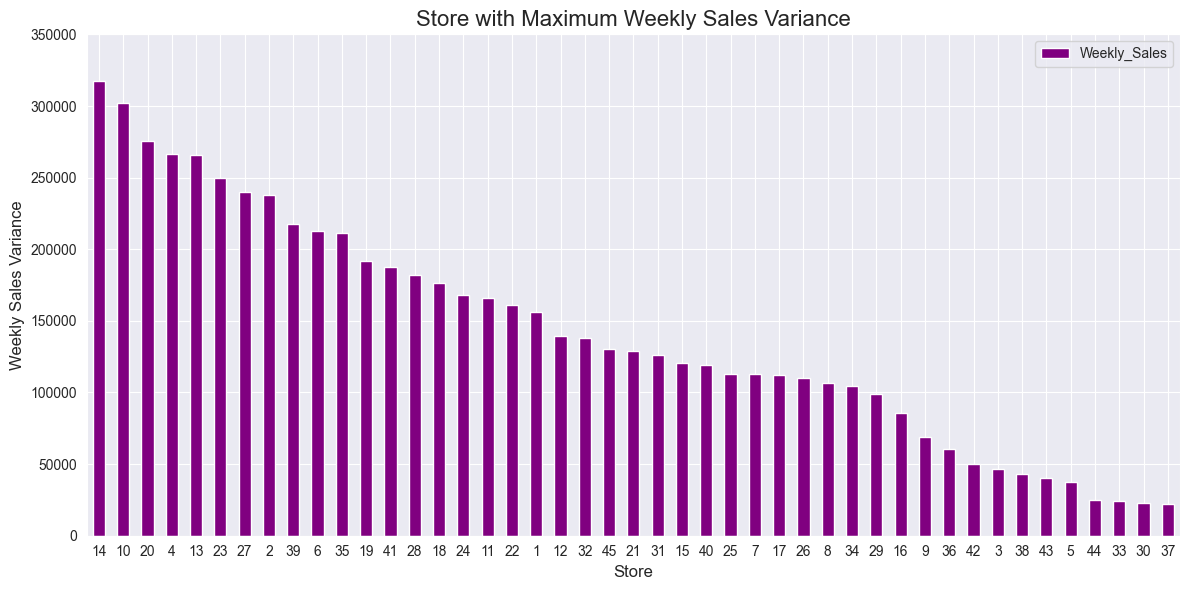

,Weekly_Sales
Store,
14,317569.949476


In [13]:
S_With_Varianced_Weekly_Sales = walmart.groupby("Store")["Weekly_Sales"].agg(np.std).to_frame().sort_values(by="Weekly_Sales",ascending=False)

# Create a bar plot
ax = S_With_Varianced_Weekly_Sales.plot(kind="bar", figsize=(12, 6), color="purple", legend=False)

# Set plot title and labels
plt.title("Store with Maximum Weekly Sales Variance", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Weekly Sales Variance", fontsize=12)
plt.xticks(rotation=0)

# Highlight the store with the maximum sales variance
max_variance_store = S_With_Varianced_Weekly_Sales[S_With_Varianced_Weekly_Sales["Weekly_Sales"] == max(S_With_Varianced_Weekly_Sales["Weekly_Sales"])]

S_With_Varianced_Weekly_Sales.to_csv("Data/S_With_Varianced_Weekly_Sales.csv")

# Calculate y-axis limits with specified steps
max_variance_value = max(S_With_Varianced_Weekly_Sales["Weekly_Sales"])
y_axis_limit = np.ceil(max_variance_value / 50000) * 50000  # Adjust the step size (50000) as needed

# Set the y-axis limits
plt.ylim(0, y_axis_limit)

# Show the plot
plt.tight_layout()
plt.legend()
plt.savefig("images/max_variance_store.png")
plt.show()

max_variance_store

### Then the store who has a great vary in the sales is store Number ___14___

# C) Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together
#### First try
**To perform that one then we need for Holiday flag , as 0 tends to non-holiday and 1 tends to holiday , and will make comparison between it and the weekly sales,Then get the stores with Negative Impact with Holidays**
#### Second Try
**Get Real Date from Kaggle and make Compare by equaling it with the same date in data and extract mean of each one then gain the insight easily**


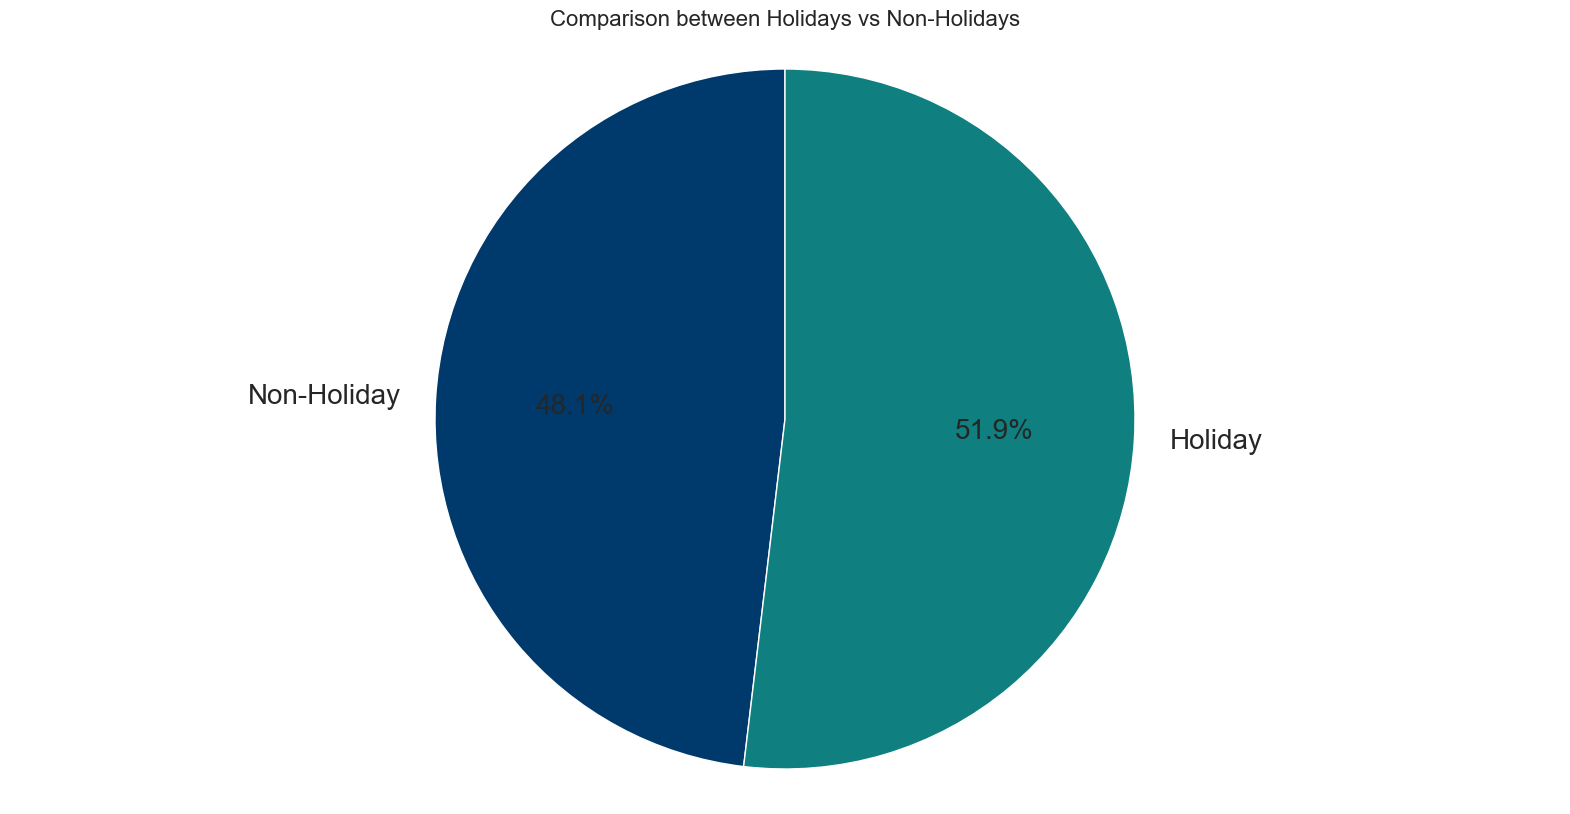

In [21]:
# Simple comparison between mean of Holidays vs Non holidays
Holiday_Vs_Non_Holiday_mean = walmart.groupby("Holiday_Flag")["Weekly_Sales"].agg(np.mean).to_frame()
Holiday_Vs_Non_Holiday_mean.to_csv("Data/Holiday_Vs_Non_Holiday_mean.csv")
# Define colors
colors = ["#003a6c", "#0f7f7f"]

# Create a pie chart
plt.figure(figsize=(20, 10))
plt.pie(
    x=Holiday_Vs_Non_Holiday_mean["Weekly_Sales"],
    labels=["Non-Holiday", "Holiday"],
    autopct="%0.1f%%",
    colors=colors,
    startangle=90,
    textprops={"fontsize": 20}
)

# Set plot title and labels
plt.title("Comparison between Holidays vs Non-Holidays", fontsize=16)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the plot as an image
plt.savefig("images/Holidays vs Non-Holidays.png")

# Show the plot
plt.show()

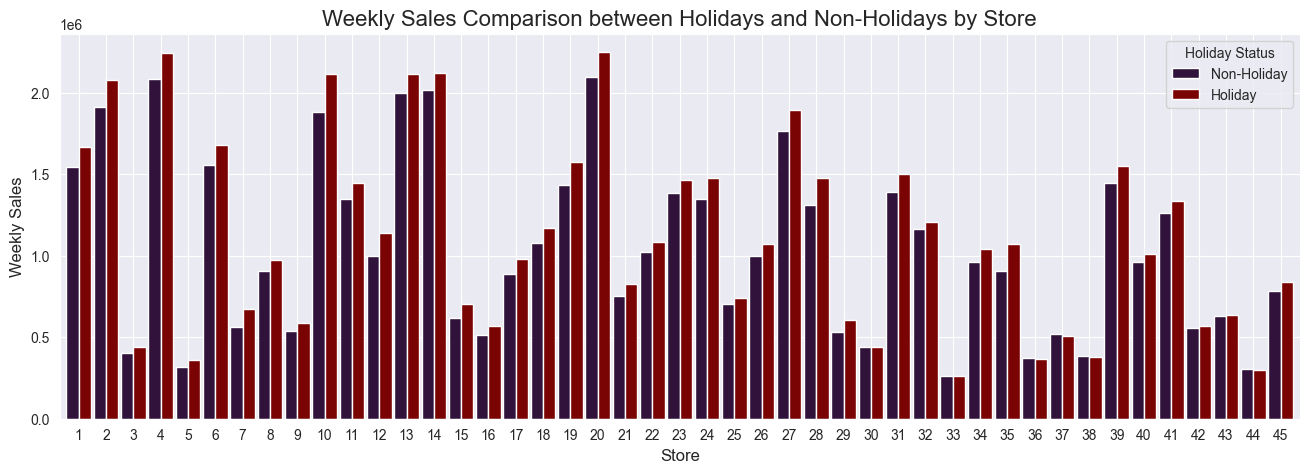

In [15]:
# First Try
Negative_Impact = pd.pivot_table(walmart,index="Store",columns="Holiday_Flag",values="Weekly_Sales",aggfunc=np.mean)
Negative_Impact.to_csv("Data/Negative_Impact.csv")
# Create a bar chart
ax = Negative_Impact.plot(kind="bar", figsize=(16, 5), rot=360, width=0.9, colormap="turbo")

# Set plot title and labels
plt.title("Weekly Sales Comparison between Holidays and Non-Holidays by Store", fontsize=16)
plt.xlabel("Store", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)

# Customize the legend
plt.legend(title="Holiday Status", labels=["Non-Holiday", "Holiday"])

# Save the plot as an image
plt.savefig("images/Negative_Impact.png")

# Show the plot
plt.show()

### Then The store "30,36,37,38 and 44" Have a bad impact in revenue

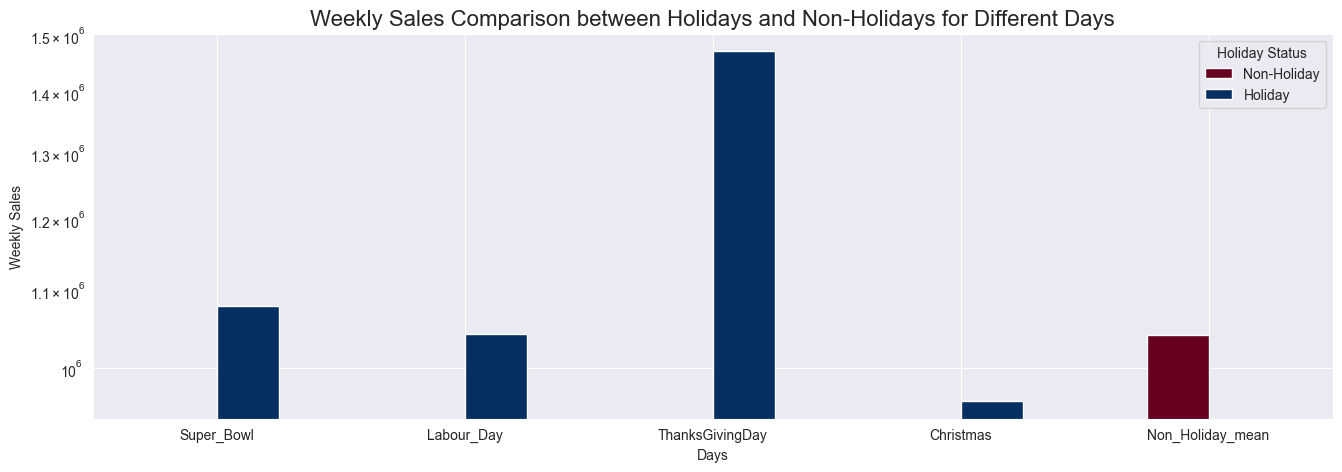

In [16]:
# Define holidays
holidays = {
    "Super_Bowl": ["12-2-2010", "11-2-2011", "10-2-2012"],
    "Labour_Day": ["10-9-2010", "9-9-2011", "7-9-2012"],
    "ThanksGivingDay": ["26-11-2010", "25-11-2011", "23-11-2012"],
    "Christmas": ["31-12-2010", "30-12-2011", "28-12-2012"]
}
# Assign holidays to the Walmart data
for holiday, dates in holidays.items():
    walmart[holiday] = walmart.loc[walmart.Date.isin(dates)]["Weekly_Sales"]
# Calculate Non-Holiday mean
walmart["Non_Holiday_mean"] = walmart[walmart["Holiday_Flag"] == 0]["Weekly_Sales"]
# Group and transpose the data for plotting
Compare_Between_every_Holiday = walmart.groupby("Holiday_Flag")[list(holidays.keys()) + ["Non_Holiday_mean"]].agg(np.mean).T
Compare_Between_every_Holiday.columns = ["Non-Holiday", "Holiday"]
Compare_Between_every_Holiday.to_csv("Data/Compare_Between_every_Holiday.csv")
# Create a bar chart
ax = Compare_Between_every_Holiday.plot(kind="bar", rot=360, ylabel="Weekly Sales", xlabel="Days", logy=True, figsize=(16, 5), colormap="RdBu")
# Set plot title
plt.title("Weekly Sales Comparison between Holidays and Non-Holidays for Different Days", fontsize=16)
# Customize the legend
plt.legend(title="Holiday Status", labels=["Non-Holiday", "Holiday"])
# Save the plot as an image
plt.savefig("images/Compare_Between_every_Holiday.png")
# Show the plot
plt.show()

##### __Then Notice again that the "Thank's Giving day" Was the best day in renvue, then "Super Bowl" then "Labour" , and Christmas in last__

d) Provide a monthly and semester view of sales in units and give 
insights.


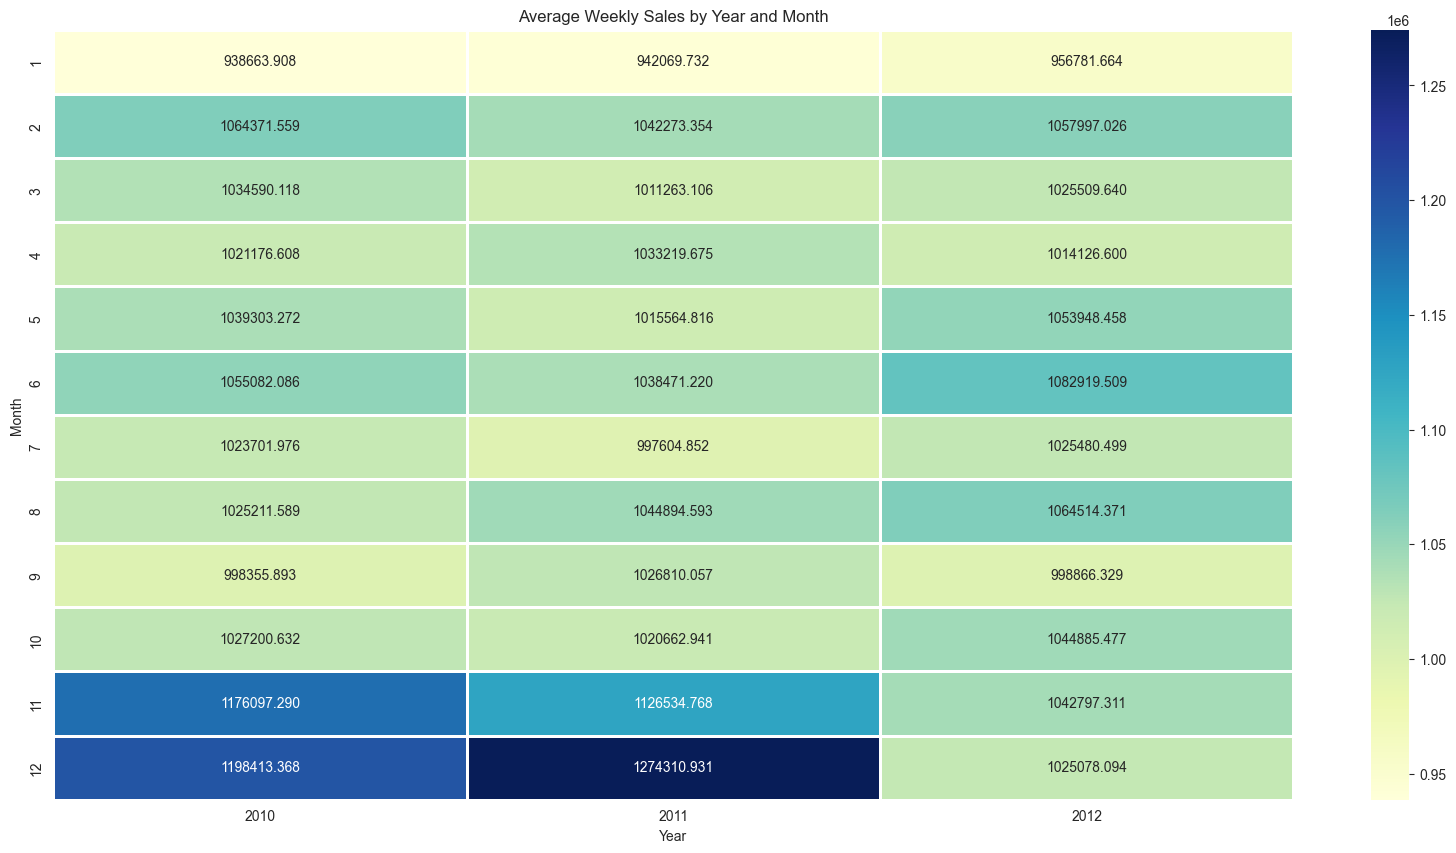

In [17]:
# Pivot the data
Year_Month_Weekly_Sales = walmart.pivot_table(index="Month", columns="Year", values="Weekly_Sales")
Year_Month_Weekly_Sales.to_csv("Data/Year_Month_Weekly_Sales.csv")
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(Year_Month_Weekly_Sales, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=1)

# Set the plot title and labels
plt.title("Average Weekly Sales by Year and Month")
plt.xlabel("Year")
plt.ylabel("Month")

plt.savefig("Images/Year_Month_Weekly_Sales.png")
# Show the plot
plt.show()


e) Plot the relations between weekly sales vs. other numeric features
and give insights.

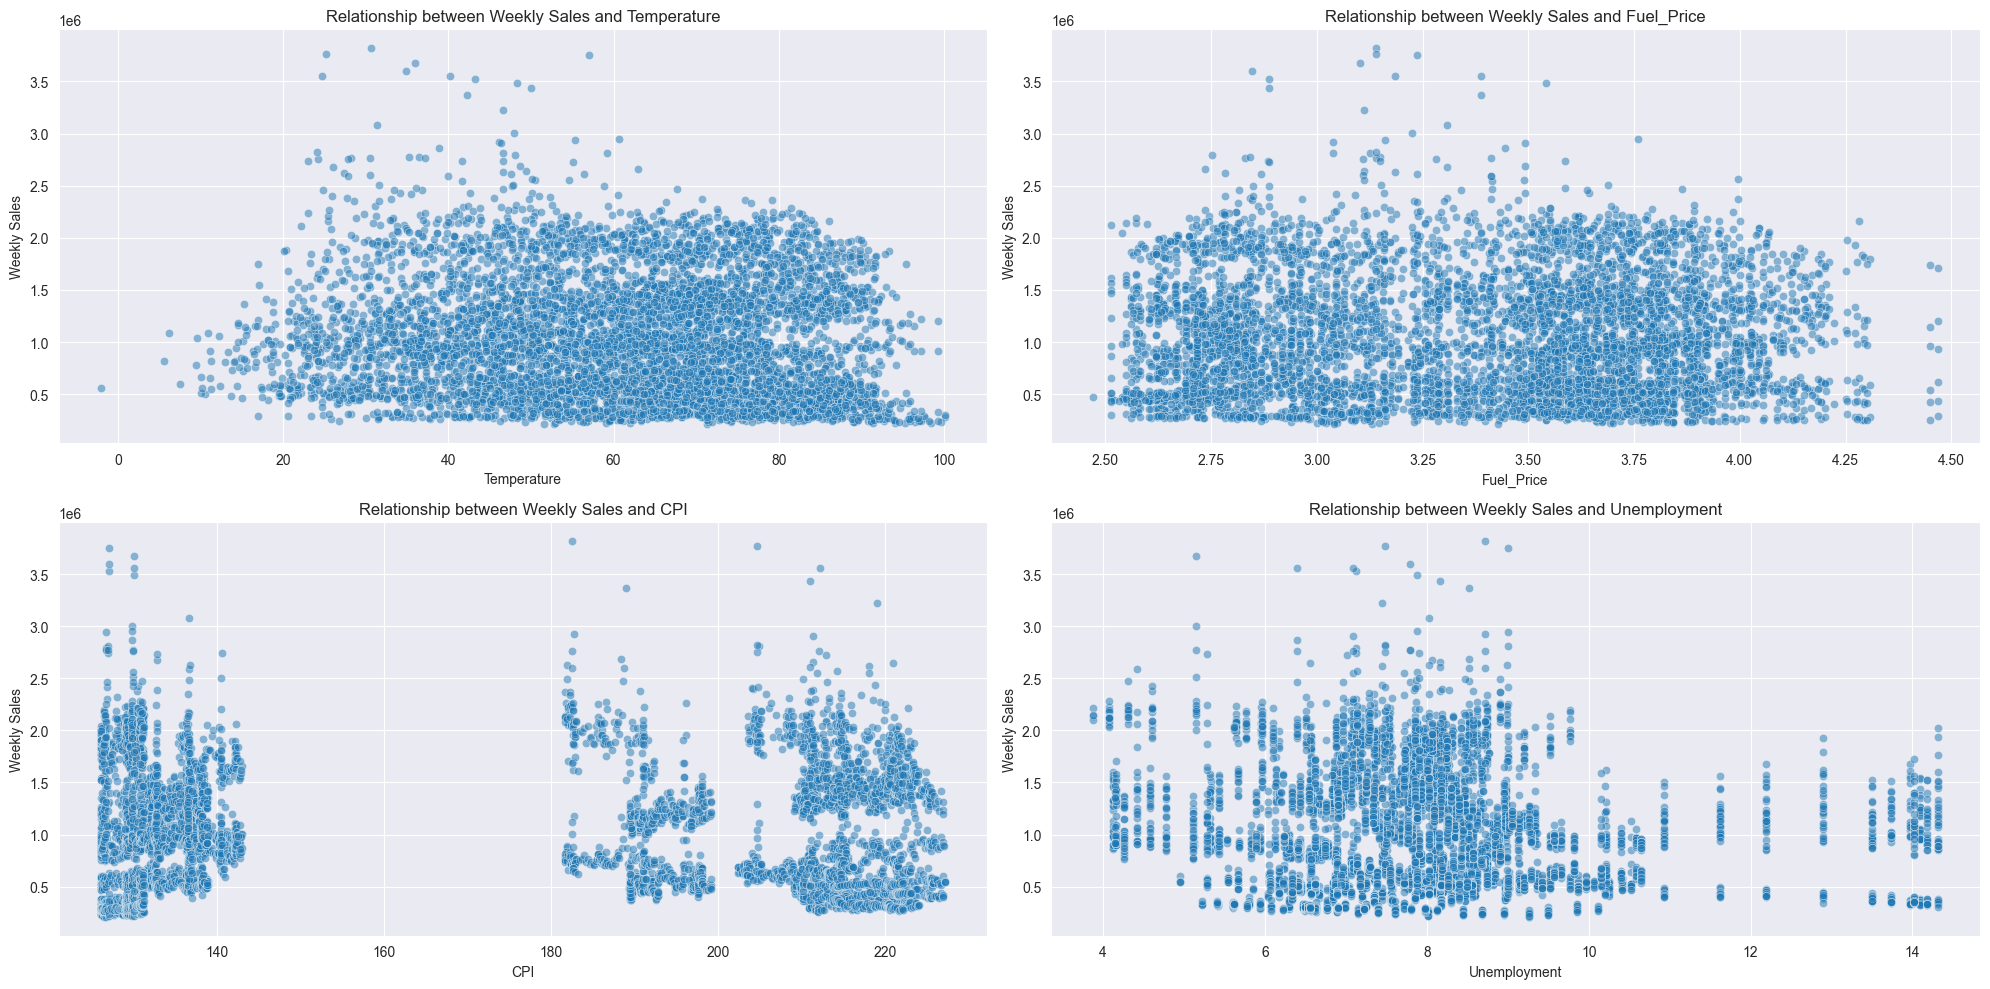

In [20]:
# Select numeric features to analyze
numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create scatterplots for each numeric feature
for i, feature in enumerate(numeric_features):
    sns.scatterplot(x=walmart[feature], y=walmart["Weekly_Sales"], alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Relationship between Weekly Sales and {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Weekly Sales')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.savefig("images/Each_Numeric_With_Weekly_Sales.png")

plt.show()


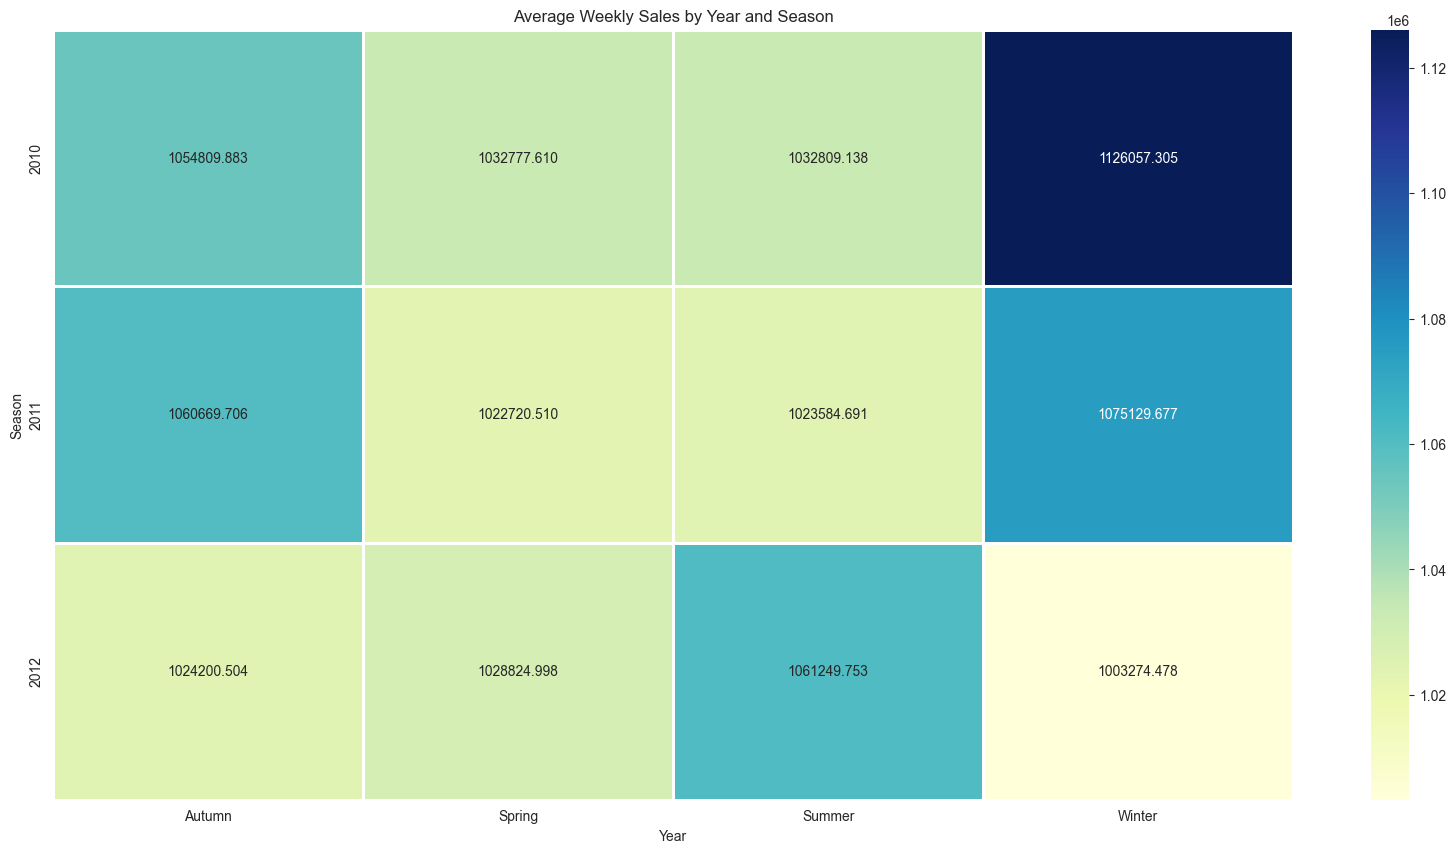

In [19]:
# Pivot the data
Seasons_VS_Years = walmart.pivot_table(index=["Year"],columns=["Season"], values="Weekly_Sales")
Seasons_VS_Years.to_csv("Data/Seasons_VS_Years.csv")
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(Seasons_VS_Years, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=1)

# Set the plot title and labels
plt.title("Average Weekly Sales by Year and Season")
plt.xlabel("Year")
plt.ylabel("Season")

plt.savefig("Images/Seasons_VS_Years.png")
# Show the plot
plt.show()
